SENG474 Project

Movie Recommendation System: Discover most suitable movies based on preference


Yu Tang(V00950703)

Khizra Hanif(V01028433)

Yanghuijing Wang(V00984404)




Abstract  


With the rapid development of the Internet and digital media, people have convenient access to a wide variety of movies. However, due to the vast number and diverse types of movies available, users often face the challenge of making choices. Movie recommendation systems aim to address this issue by analyzing user preferences and behavior data to provide personalized movie recommendations, helping users discover films they might be interested in. Data mining plays a crucial role in various aspects of movie recommendation systems, including user behavior analysis, movie content analysis, and collaborative filtering. By analyzing users' historical behavior data, the system can understand their preferences and habits, generating personalized recommendations based on this information. Additionally, data mining can analyze movie content, identifying similarities and associations between movies to better understand users' interests.



1 Introduction

2.Related work

3 Data Preprocessing

     3.1 Data collection and analysis
     3.2 Data cleaning
     3.3 Data partitioning
4 Data Mining

     4.1 Train and test set

     4.2 Create a data about raitngs of movie

5.Evaluation

6.Conclusion

7.References

# **1.Introduction**

With the rapid development of digital media and the increasing number of movies, users are faced with a daunting task of choosing what to watch. A movie recommendation system is an intelligent system that utilizes machine learning and data analysis techniques to provide personalized recommendations based on users' interests and preferences from a vast movie library, helping them discover and enjoy movies that align with their tastes.

# **2.Related Work**

In the field of movie recommendation systems, researchers have proposed various methods aiming to provide personalized movie recommendations based on user preferences and behavior. Here is an overview of some relevant work in movie recommendation systems: collaborative filtering, deep learning methods, and content-based filtering.

# **Important data**

Few important datas

title: Name of the movie

release_year: Which the movie hase been released

release_day:  Which day the movie hase been released

mean_rating: The mean rating of movie


**The following cell contains package and dataset import.**

In [1]:
!pip install seaborn
!pip install nltk
!pip install wordcloud

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics.pairwise import linear_kernel
from scipy.sparse.linalg import svds
import random
# suppress warnings
import warnings
warnings.filterwarnings('ignore')


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\LVBING\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\LVBING\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\LVBING\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Get the Data

In [2]:
import pandas as pd

movies_data = pd.read_csv('https://raw.githubusercontent.com/disha2sinha/Movie-Recommendation-System/master/Revised%20Datasets/MoviesData.csv?token=AKDEMFJGJGYK3CWGGTMI3CLABWC5M',engine='python',index_col=0)

# Take a Quick Look at the Data Structure

In [3]:
# display the first 5 rows of the dataset by calling the head() function on medical
movies_data.head()

,tmdbId,title,release_year,release_day,genres,original_language,runtime,content,production_companies,budget,...,production_countries,status,popularity,vote_average,vote_count,keywords,cast,director,rating_count,mean_rating
index,,,,,,,,,,,,,,,,,,,,,
0,119450,Dawn of the Planet of the Apes,2014,Thursday,Science Fiction|Action|Drama|Thriller,English,130.0,A group of scientists in San Francisco struggl...,Ingenious Media|Chernin Entertainment|TSG Ente...,170000000,...,United States of America,Released,75.385211,7.3,4511.0,"['leader', 'colony', 'post-apocalyptic', 'dyst...",Andy Serkis|Jason Clarke|Gary Oldman|Keri Russ...,Matt Reeves,341.0,4.054252
1,2124,Color of Night,1994,Friday,Drama|Mystery|Romance|Thriller,English,121.0,When New York psychiatrist Bill Capa visits Lo...,Hollywood Pictures|Cinergi Pictures Entertainment,40000000,...,United States of America,Released,14.228963,5.4,117.0,"['suicide', 'california', 'sex', 'secret ident...",Bruce Willis|Jane March|Rubén Blades|Lesley An...,Richard Rush,324.0,4.256173
2,75656,Now You See Me,2013,Wednesday,Thriller|Crime,English,115.0,An FBI agent and an Interpol detective track a...,Summit Entertainment|K/O Paper Products|SOIXAN...,75000000,...,United States of America|France,Released,17.852022,7.3,5635.0,"['paris', 'bank', 'secret', 'fbi', 'vault', 'm...",Jesse Eisenberg|Mark Ruffalo|Woody Harrelson|M...,Louis Leterrier,311.0,4.487138
3,567,Rear Window,1954,Sunday,Drama|Mystery|Thriller,English,112.0,"Professional photographer L.B. ""Jeff"" Jeffries...",Paramount Pictures,1000000,...,United States of America,Released,17.911314,8.2,1531.0,"['nurse', 'photographer', 'suspicion of murder...",James Stewart|Grace Kelly|Wendell Corey|Thelma...,Alfred Hitchcock,304.0,4.138158
4,24428,The Avengers,2012,Wednesday,Science Fiction|Action|Adventure,English,143.0,When an unexpected enemy emerges and threatens...,Paramount Pictures|Marvel Studios,220000000,...,United States of America,Released,89.887648,7.4,12000.0,"['new york', 'shield', 'marvel comic', 'superh...",Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,291.0,4.221649


In [4]:
# get the number of rows, columns, and data types by using the info() method
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9081 entries, 0 to 9217
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tmdbId                9081 non-null   int64  
 1   title                 9081 non-null   object 
 2   release_year          9081 non-null   int64  
 3   release_day           9081 non-null   object 
 4   genres                9046 non-null   object 
 5   original_language     9079 non-null   object 
 6   runtime               9081 non-null   float64
 7   content               9069 non-null   object 
 8   production_companies  8417 non-null   object 
 9   budget                9081 non-null   int64  
 10  revenue               9081 non-null   float64
 11  production_countries  8787 non-null   object 
 12  status                9081 non-null   object 
 13  popularity            9081 non-null   float64
 14  vote_average          9081 non-null   float64
 15  vote_count            9081

## **3.1 Data Cleaning**



In [5]:
# data cleaning
movies_data=movies_data.replace(np.nan,'Unknown',regex=True)
movies_data['release_year']=movies_data['release_year'].replace('NaT','1874',regex=True)

**Below function is used to find the language type of the movie **

In [6]:
def count_types(data,column,array):
  type_count=dict()
  for item in array:
    type_count[item]=0
  for types in movies_data[column].str.split('|'):
    for item in types:
      type_count[item] += 1
  type_occurences = []
  for k,v in type_count.items():
    type_occurences.append([k,v])
  type_occurences.sort(key = lambda x:x[1], reverse = True)
  return type_occurences

# **Data Visulazition**

The following cells contains some visualization of the imported dataset using various plotting methods.

In [7]:
# show the number of genres
movies_data["genres"].value_counts()

genres
Drama                                   732
Comedy                                  554
Drama|Romance                           375
Comedy|Drama                            314
Documentary                             268
                                       ... 
Horror|Comedy|Science Fiction             1
Thriller|Action|Adventure                 1
Fantasy|Music|Romance                     1
Drama|Family|Fantasy|Science Fiction      1
War|Action|Drama|History|Thriller         1
Name: count, Length: 1711, dtype: int64

Let’s look at the other fields. The describe() method shows a summary
of the numerical attributes.

In [8]:
# show descriptive statistics for the dataset by calling the describe() method on medical
movies_data.describe()

,tmdbId,release_year,runtime,budget,revenue,popularity,vote_average,vote_count,rating_count,mean_rating
count,9081.000000,9081.000000,9081.000000,9.081000e+03,9.081000e+03,9081.000000,9081.000000,9081.000000,9081.000000,9081.000000
mean,38709.425724,1991.949895,105.660610,2.569779e+07,6.510219e+07,7.268057,6.362163,438.957384,6.280476,0.788264
std,62126.753092,19.387744,30.352285,3.005569e+07,1.251433e+08,9.372508,1.038804,996.171502,22.874443,1.484708
min,2.000000,1902.000000,0.000000,1.000000e+00,1.000000e+00,0.000004,0.000000,0.000000,0.000000,0.000000
25%,9446.000000,1984.000000,93.000000,1.800000e+07,3.005003e+07,2.954184,5.800000,29.000000,0.000000,0.000000
50%,15765.000000,1997.000000,102.000000,1.850000e+07,3.345787e+07,6.417420,6.500000,96.000000,0.000000,0.000000
75%,39002.000000,2006.000000,115.000000,2.000000e+07,3.669940e+07,9.861672,7.000000,365.000000,0.000000,0.000000
max,416437.000000,2016.000000,1140.000000,3.800000e+08,2.787965e+09,547.488298,10.000000,14075.000000,341.000000,5.000000


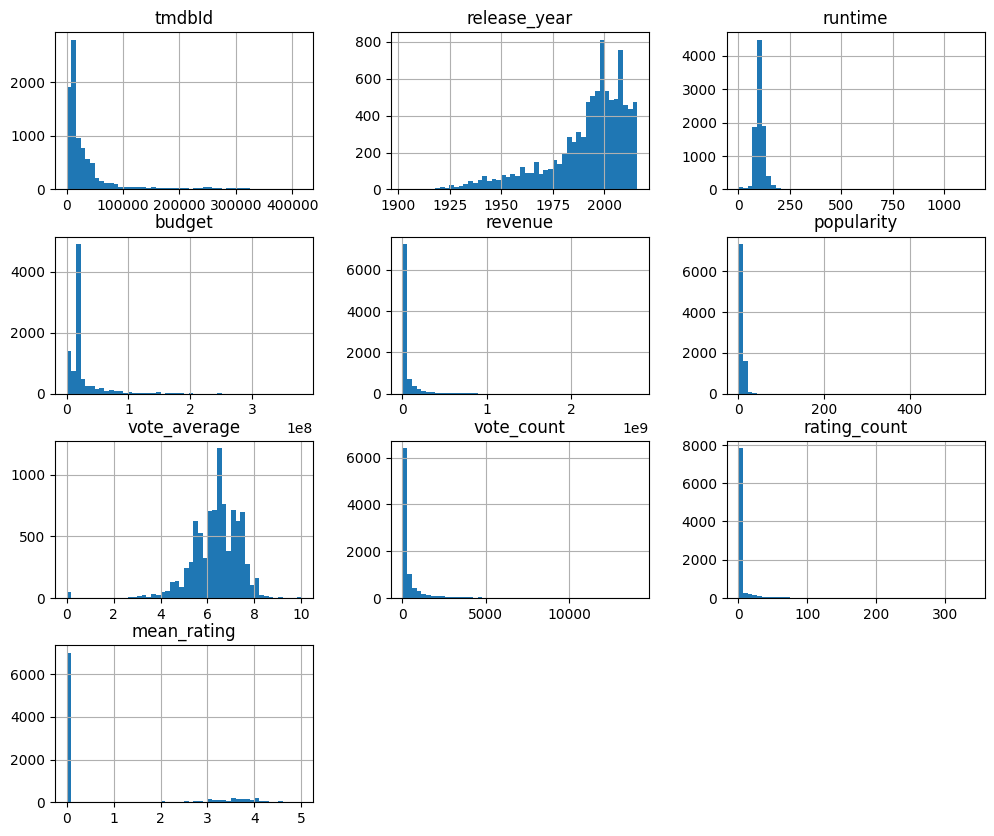

In [9]:
# show histograms for the numerical columns by using the hist() method on medical
import matplotlib.pyplot as plt

movies_data.hist(bins=50, figsize=(12, 10))
plt.show()

In [10]:
# use train_test_split() to split the data into training and test sets
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(movies_data, test_size=0.2, random_state=42)
len(train_set), len(test_set)

(7264, 1817)

In [11]:
# make a copy of the train set and save it to a variable called medical
movies_data = train_set.copy()

Text(0.5, 1.0, 'Distribution of mean_reating')

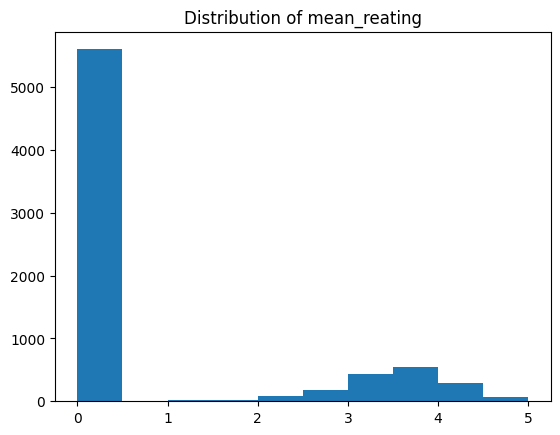

In [12]:
# build a histogram of the charges column
import matplotlib.pyplot as plt

plt.hist(movies_data['mean_rating'])
plt.title('Distribution of mean_reating')

This distribution is right-skewed. To make it closer to normal we can apply natural log

Text(0.5, 1.0, 'Distribution of mean rating')

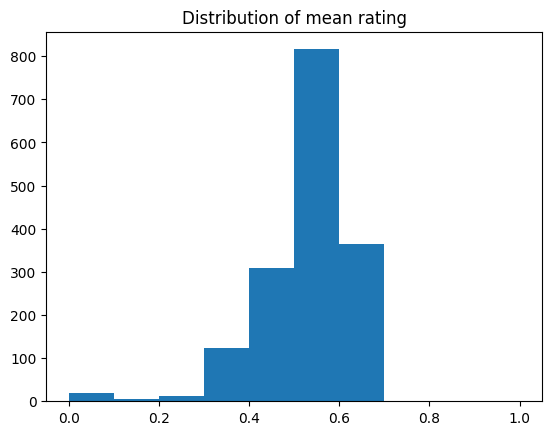

In [13]:
import numpy as np
plt.hist(np.log10(movies_data['mean_rating']), range=(0, 1))
plt.title('Distribution of mean rating')


In [14]:
# compute pairwise correlation of columns using the corr() method
numeric_columns = movies_data.select_dtypes(include=np.number)
correlation_matrix = numeric_columns.corr()


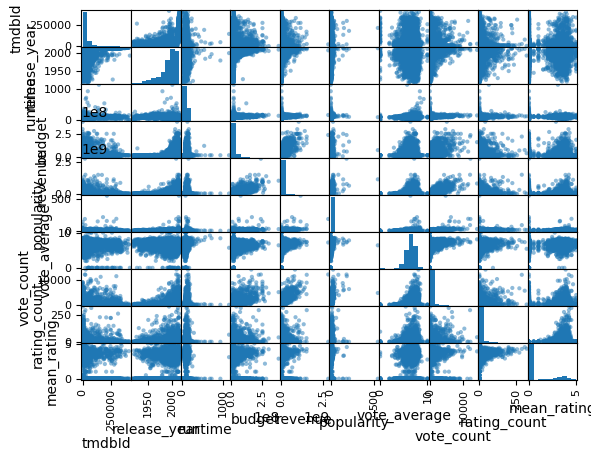

In [15]:
from pandas.plotting import scatter_matrix

scatter_matrix(movies_data)
plt.show()

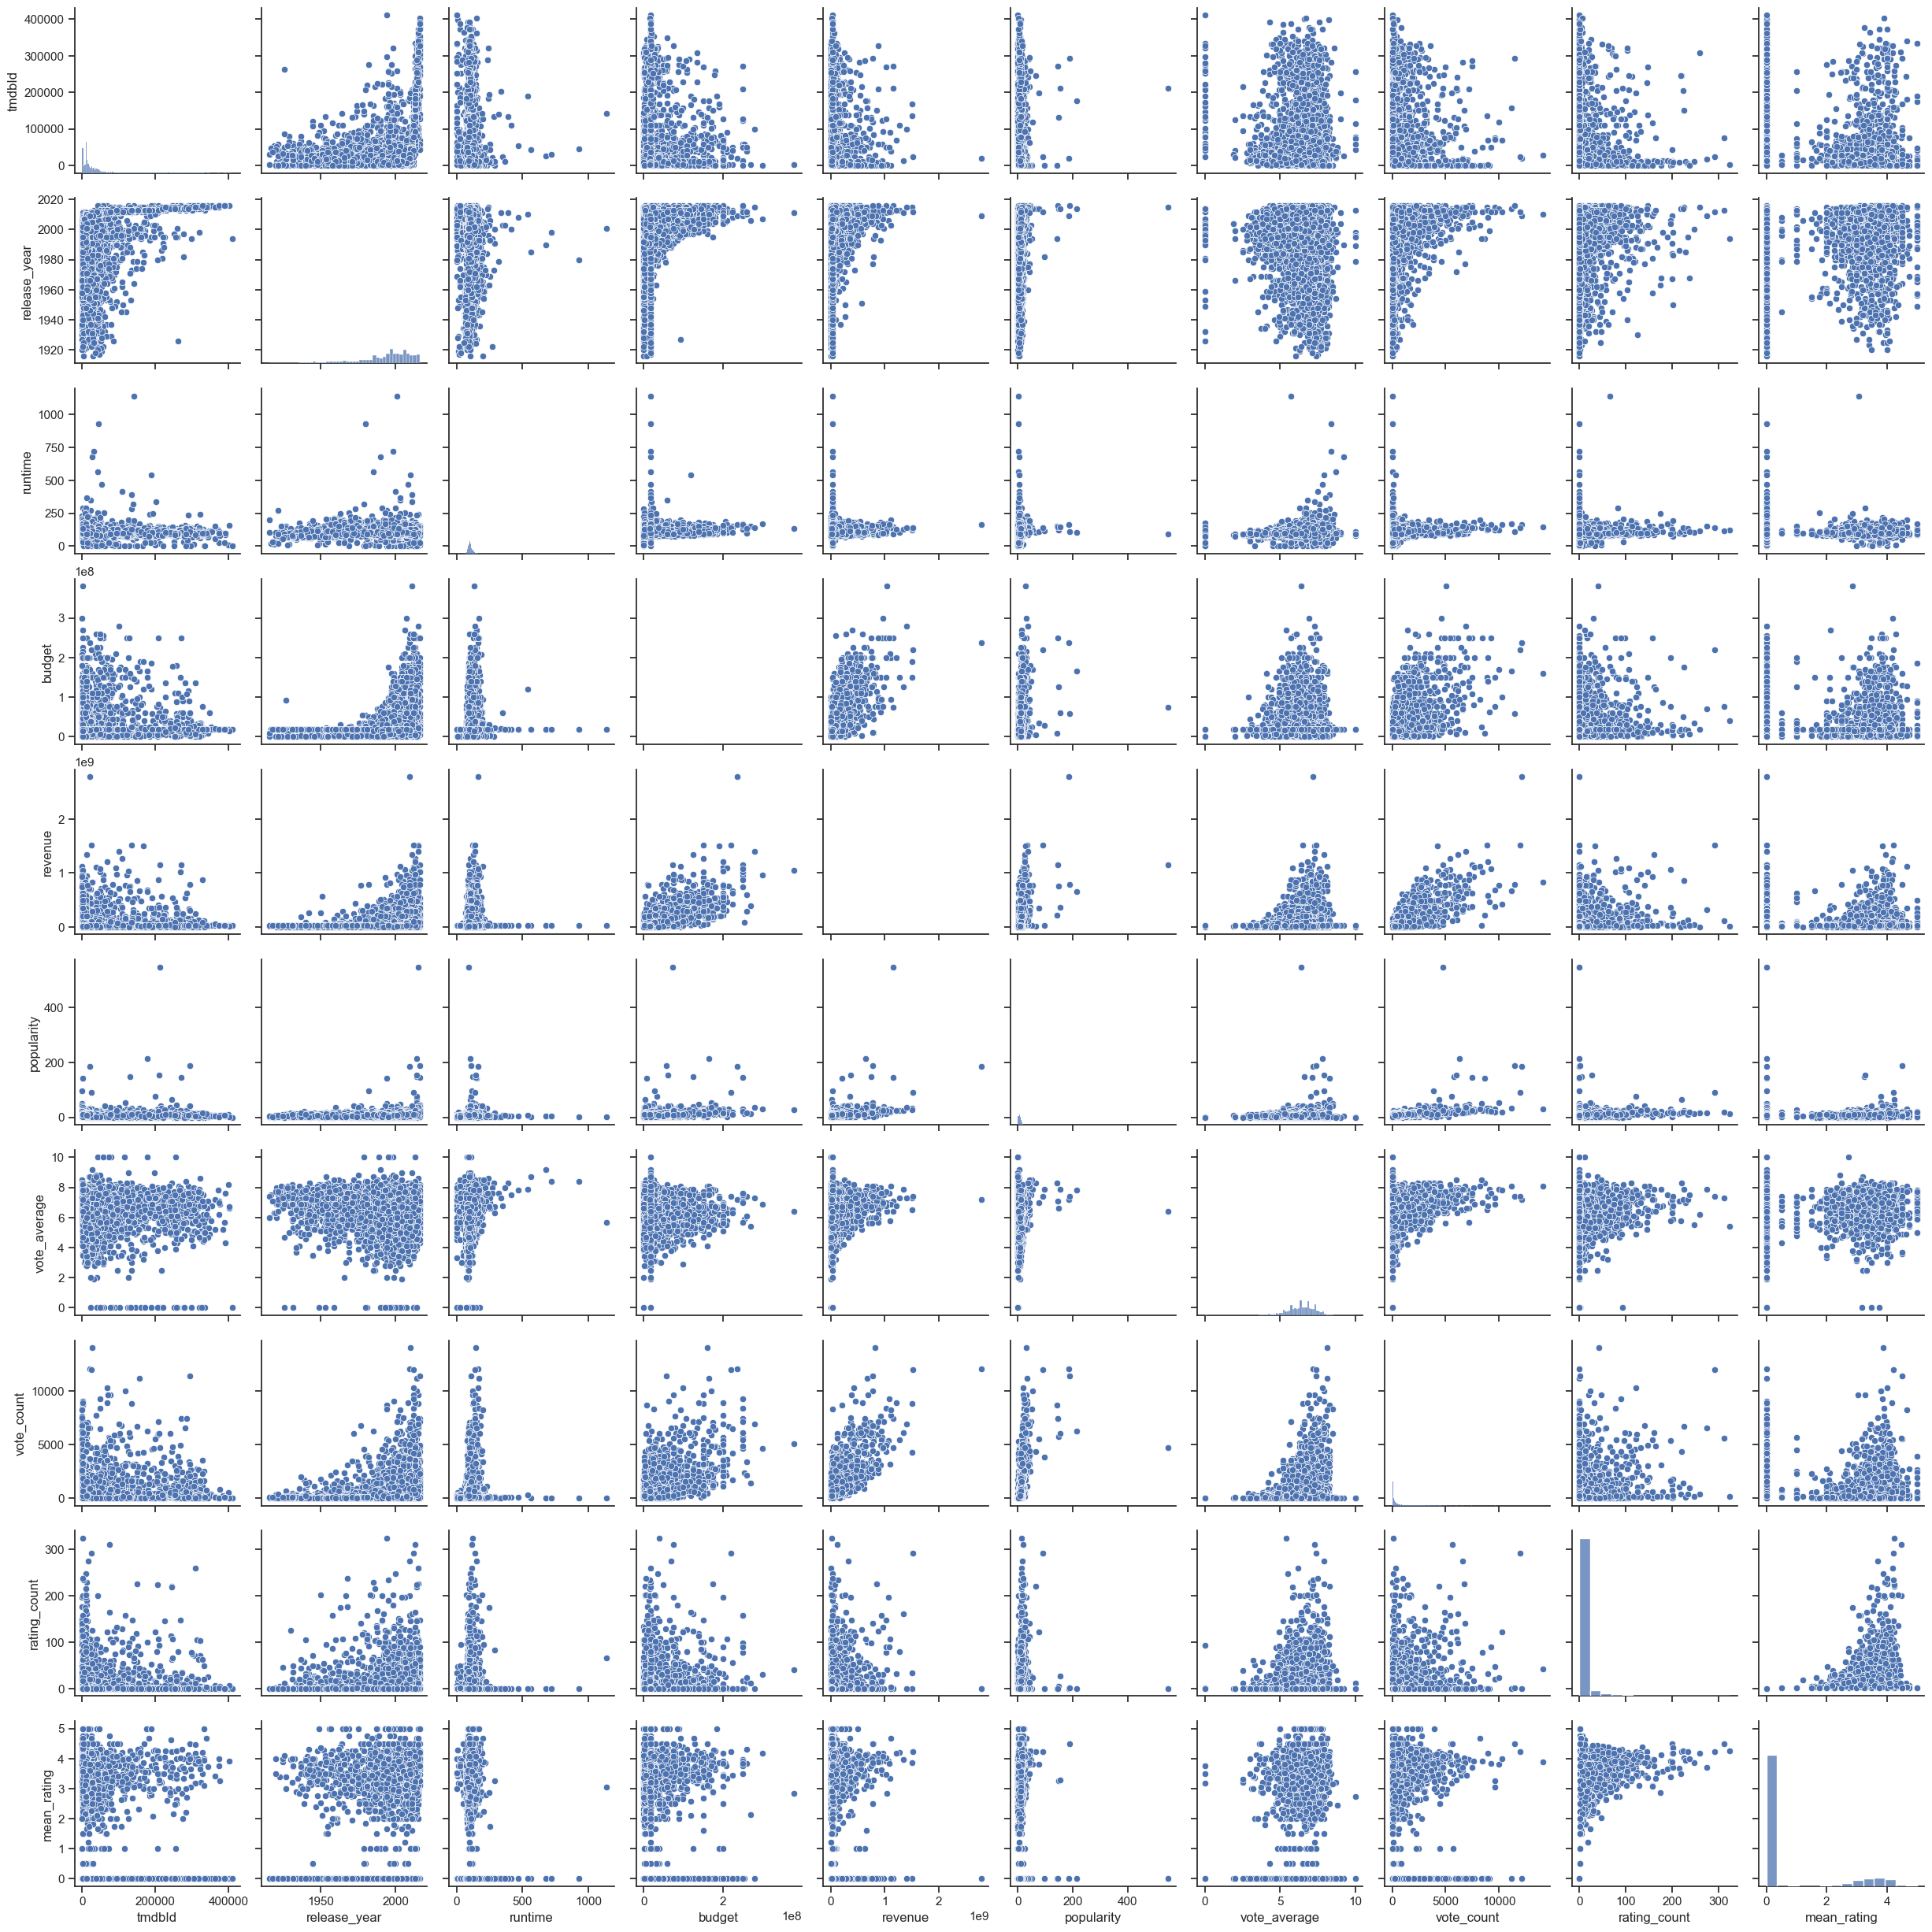

In [16]:
# plot correlation matrix using scatter_matrix() function from pandas.plotting
from pandas.plotting import scatter_matrix

# scatter_matrix(movies_data)
# plt.show()
sns.set(style="ticks", color_codes=True)
sns.pairplot(movies_data)

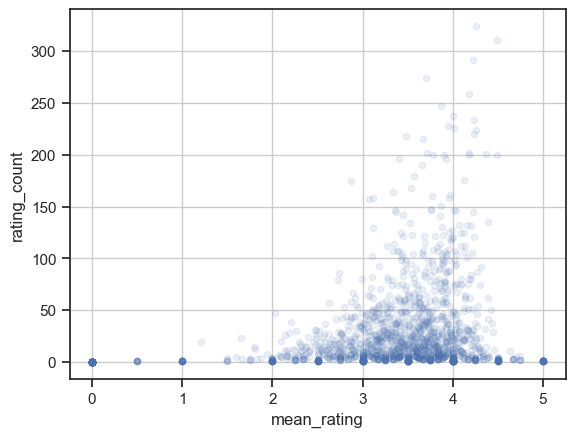

In [17]:
# plot a scatter plot of bmi vs. insurance costs using the medical.plot() method, use the alpha parameter to set the opacity of the points to 0.1
movies_data.plot(kind="scatter",
             x="mean_rating",
             y="rating_count",
             alpha=0.1, grid=True)
plt.show()

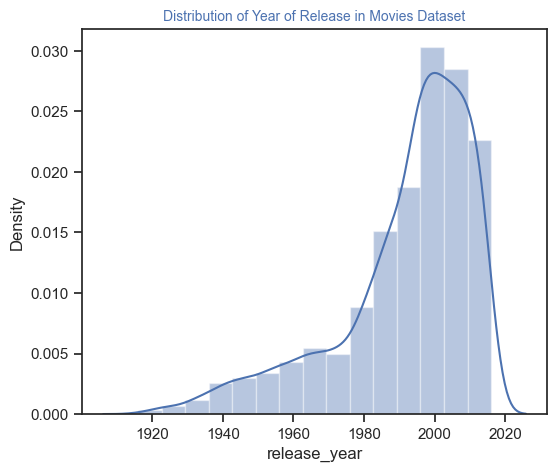

In [18]:
fig, axes = plt.subplots(figsize=(6, 5))
sns.distplot(movies_data['release_year'],bins=15)
plt.title("Distribution of Year of Release in Movies Dataset",color='b',fontsize = 10)
plt.savefig('Year_Distribution.jpg')

# **The following cells show the distribution of languages of given dataset**

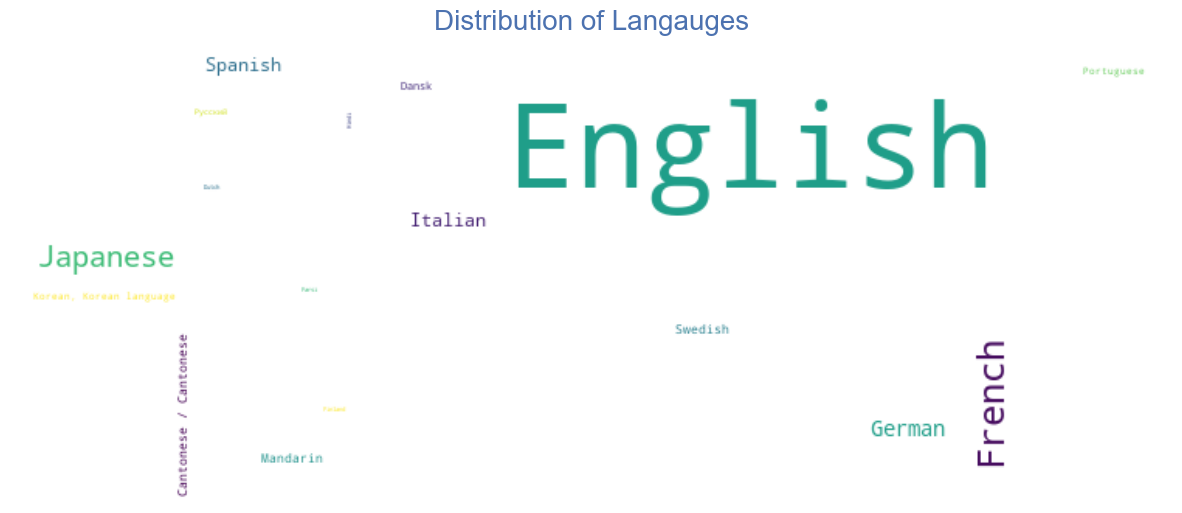

In [19]:
from wordcloud import WordCloud
language_list = []
for language in movies_data['original_language'].unique():
  language_list.append(language)
language_type_occurences= count_types(movies_data, 'original_language', language_list)
language = dict()
for s in language_type_occurences:
    language[s[0]] = s[1]
tone = 300 # define the color of the words
f, ax = plt.subplots(figsize=(15, 10))
wordcloud = WordCloud(width=750,height=300, background_color='white',
                      max_words=80,relative_scaling=0.7,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(language)
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Distribution of Langauges",color='b',fontsize = 20)
plt.axis('off')
plt.savefig('Langs_Distribution.jpg')

plt.show()

# **The following cells show the distribution of genres of given dataset**

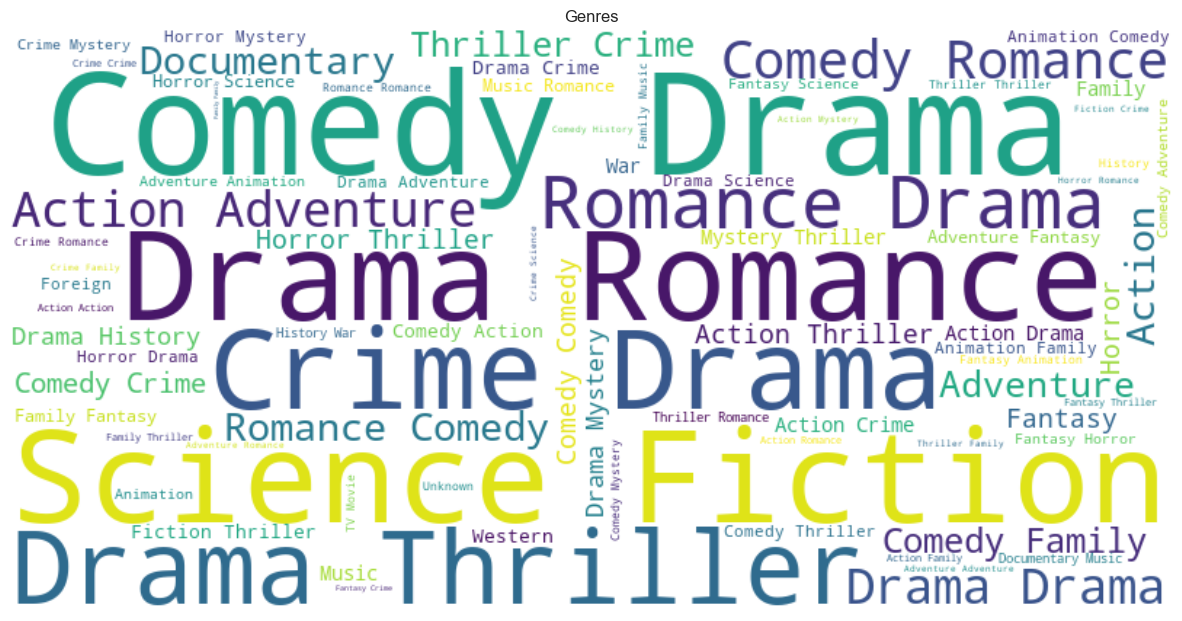

In [20]:
genres_data = movies_data['genres'].str.cat(sep='|')
wordcloud_genres = WordCloud(background_color='white', width=800, height=400).generate(genres_data)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_genres, interpolation="bilinear")
plt.title("Genres")
plt.axis('off')
plt.show()



# **The following cells show the distribution of content of given dataset**

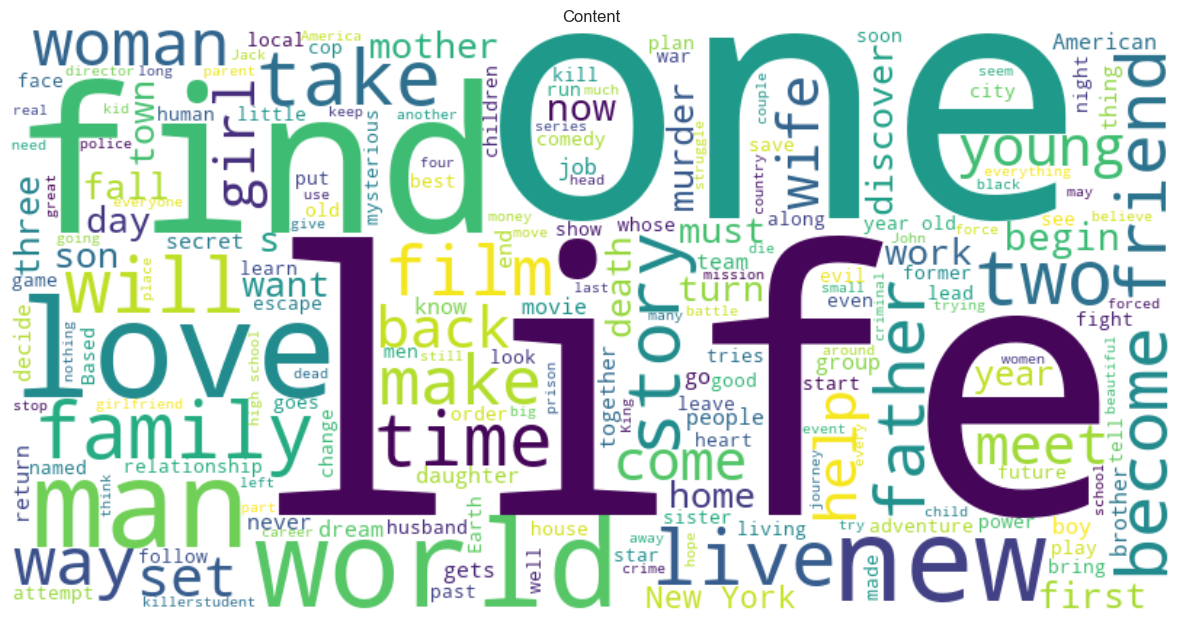

In [21]:
content_data = movies_data['content'].str.cat(sep='|')

wordcloud_content = WordCloud(background_color='white', width=800, height=400).generate(content_data)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_content, interpolation="bilinear")
plt.title("Content")
plt.axis('off')
plt.show()

# **The following cells show the distribution of Production Companies of given dataset**

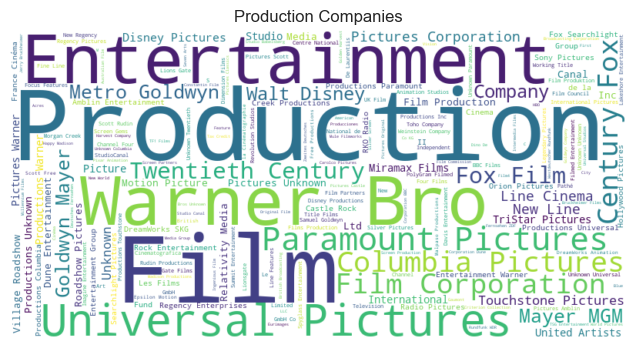

In [22]:
production_companies_data = movies_data['production_companies'].str.cat(sep='|')

wordcloud_production_companies = WordCloud(background_color='white', width=800, height=400).generate(production_companies_data)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud_production_companies, interpolation="bilinear")
plt.title("Production Companies")
plt.axis('off')
plt.show()

# **4.Data Mining**

Out goal is when user provide a movie name, then our machine will provide the some recommendations related to that movie based on genre, rating,etc

**Train and test set**

In [23]:
movies_data = train_set.drop("vote_average", axis=1)
movies_data_labels = train_set["vote_average"].copy()
movies_data.head()

,tmdbId,title,release_year,release_day,genres,original_language,runtime,content,production_companies,budget,revenue,production_countries,status,popularity,vote_count,keywords,cast,director,rating_count,mean_rating
index,,,,,,,,,,,,,,,,,,,,
3255,14774,Cheech & Chong's The Corsican Brothers,1984,Friday,Comedy,English,82.0,Two brothers who can feel each others' pain an...,MGM Home Entertainment,18500000,33457866.5,United States of America,Released,3.767854,25.0,"['clowning', 'mistaken identity', 'twins']",Cheech Marin|Tommy Chong|Roy Dotrice|Shelby Ch...,Tommy Chong,0.0,0.0
2560,34667,Nightfall,1957,Monday,Action|Crime|Thriller,English,78.0,An innocent man turns fugitive as he reconstru...,Copa Productions,18500000,33457866.5,United States of America,Released,3.457573,14.0,"['suspense', 'model', 'film noir']",Aldo Ray|Brian Keith|Anne Bancroft|Jocelyn Bra...,Jacques Tourneur,0.0,0.0
4704,19214,Passion of Mind,2000,Friday,Drama|Romance,English,105.0,"When Marie, a widow in Provence with two daugh...",Unknown,18500000,33457866.5,United States of America,Released,2.224117,6.0,['independent film'],William Fichtner|Demi Moore|Eloise Eonnet|Juli...,Alain Berliner,0.0,0.0
3374,9555,Rabbit-Proof Fence,2002,Monday,Adventure|Drama|Action|History,English,94.0,"In 1931, three aboriginal girls escape after b...",Showtime Australia|Australian Film Finance Cor...,18500000,33457866.5,Australia,Released,4.403771,86.0,"['child abuse', 'sister sister relationship', ...",Everlyn Sampi|Tianna Sansbury|Laura Monaghan|K...,Phillip Noyce,0.0,0.0
4464,39287,Stagecoach,1966,Thursday,Western,English,115.0,A group of unlikely travelling companions find...,Twentieth Century Fox Film Corporation,18500000,33457866.5,United States of America,Released,0.631761,6.0,"['stagecoach', 'traveller']",Ann-Margret|Red Buttons|Mike Connors|Bing Cros...,Gordon Douglas,0.0,0.0


In [24]:
movies_data['content'] = movies_data['title'] + ' ' + movies_data['genres'] + ' ' + movies_data['content'] + ' ' + movies_data['production_companies'] + ' ' + movies_data['keywords'] + ' ' + movies_data['cast'] + ' ' + movies_data['director']


In [25]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies_data['content'].fillna(''))
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# **Create a data about raitngs of movie**

In [26]:

ratings_data=pd.read_csv('https://raw.githubusercontent.com/disha2sinha/Movie-Recommendation-System/master/Revised%20Datasets/RevisedRatings.csv?token=AKDEMFPBZWMGMKXJLF375W3ACQQ26', index_col=0, engine='python')
ratings_data.head()


,rating,tmdbId
userId,,
1,2.5,9909
7,3.0,9909
31,4.0,9909
32,4.0,9909
36,3.0,9909


In [27]:

# Merge the movie and user datasets on the 'tmdbId' column
combined_data = pd.merge(movies_data,ratings_data, on='tmdbId')

# **Do the prediction**

In [28]:
user_movie_matrix = combined_data.pivot_table(index=combined_data.index, columns='title', values='rating_count')
user_movie_matrix = user_movie_matrix.fillna(0)
user_movie_matrix_normalized = user_movie_matrix.values - user_movie_matrix.mean(axis=1).values.reshape(-1, 1)

# Collaborative filtering
k = 10  # Reduced value for k
U, sigma, Vt = svds(user_movie_matrix_normalized, k=k)
sigma = np.diag(sigma)
predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_movie_matrix.mean(axis=1).values.reshape(-1, 1)
predicted_ratings = pd.DataFrame(predicted_ratings, columns=user_movie_matrix.columns, index=user_movie_matrix.index)
predicted_ratings_df = pd.DataFrame(predicted_ratings, columns=user_movie_matrix.columns, index=user_movie_matrix.index)

**The function below is to get the recommendation movie**

In [29]:
# Combine content-based and collaborative filtering
def get_recommendations(user_id, movie_title, cosine_sim=cosine_sim, predicted_ratings=predicted_ratings):
    indices = pd.Series(combined_data.index, index=combined_data['title']).drop_duplicates()
    idx = indices[movie_title]

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1][0], reverse=True)

    # sim_scores = sorted(sim_scores, key=lambda x: np.any(x[1]), reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]

    user_ratings = predicted_ratings.loc[user_id].sort_values(ascending=False)
    recommended_movies = user_ratings.iloc[movie_indices]

    return recommended_movies


# **The cells below do some tests on different user and movie title to see if our machine will recommend reasonable movie**

In [30]:

user_id = 31
movie_title = 'Rabbit-Proof Fence'
recommended_movies = get_recommendations(user_id, movie_title, cosine_sim, predicted_ratings)
print(recommended_movies)



title
Stagecoach                   0.0
$9.99                        0.0
Spy Game                     0.0
Stage Door                   0.0
Stage Beauty                 0.0
St. Vincent                  0.0
St. Elmo's Fire              0.0
Squanto: A Warrior's Tale    0.0
Spy Kids 3-D: Game Over      0.0
Name: 31, dtype: float64


In [31]:
def get_recommendations(user_id, title, cosine_sim=cosine_sim, predicted_ratings=predicted_ratings):
    indices = pd.Series(combined_data.index, index=combined_data['title']).drop_duplicates()
    idx = indices[title]

    sim_scores = np.argsort(cosine_sim[idx])[::-1]
    sim_scores = sim_scores[1:11]
    valid_indices = np.isin(sim_scores, predicted_ratings.columns)

    movie_indices = sim_scores[valid_indices]

    user_ratings = predicted_ratings.loc[user_id].sort_values(ascending=False)
    recommended_movies = user_ratings.index[movie_indices]

    return recommended_movies

# Test the recommendation system
user_id = 31
movie_title = 'Rabbit-Proof Fence'

recommended_movies = get_recommendations(user_id, movie_title)

# Evaluate the system
true_ratings = user_movie_matrix.loc[user_id][recommended_movies].values
predicted_ratings = predicted_ratings.loc[user_id][recommended_movies].values

if len(true_ratings) > 0 and len(predicted_ratings) > 0:
    mse = mean_squared_error(true_ratings, predicted_ratings)
    print("Mean Squared Error (MSE):", mse)
else:
    print("No ratings found for the user or no recommendations available.")



No ratings found for the user or no recommendations available.


In [32]:
combined_data.head()

,tmdbId,title,release_year,release_day,genres,original_language,runtime,content,production_companies,budget,...,production_countries,status,popularity,vote_count,keywords,cast,director,rating_count,mean_rating,rating
0,14774,Cheech & Chong's The Corsican Brothers,1984,Friday,Comedy,English,82.0,Cheech & Chong's The Corsican Brothers Comedy ...,MGM Home Entertainment,18500000,...,United States of America,Released,3.767854,25.0,"['clowning', 'mistaken identity', 'twins']",Cheech Marin|Tommy Chong|Roy Dotrice|Shelby Ch...,Tommy Chong,0.0,0.0,3.0
1,19214,Passion of Mind,2000,Friday,Drama|Romance,English,105.0,"Passion of Mind Drama|Romance When Marie, a wi...",Unknown,18500000,...,United States of America,Released,2.224117,6.0,['independent film'],William Fichtner|Demi Moore|Eloise Eonnet|Juli...,Alain Berliner,0.0,0.0,4.0
2,19214,Passion of Mind,2000,Friday,Drama|Romance,English,105.0,"Passion of Mind Drama|Romance When Marie, a wi...",Unknown,18500000,...,United States of America,Released,2.224117,6.0,['independent film'],William Fichtner|Demi Moore|Eloise Eonnet|Juli...,Alain Berliner,0.0,0.0,2.0
3,9555,Rabbit-Proof Fence,2002,Monday,Adventure|Drama|Action|History,English,94.0,Rabbit-Proof Fence Adventure|Drama|Action|Hist...,Showtime Australia|Australian Film Finance Cor...,18500000,...,Australia,Released,4.403771,86.0,"['child abuse', 'sister sister relationship', ...",Everlyn Sampi|Tianna Sansbury|Laura Monaghan|K...,Phillip Noyce,0.0,0.0,4.0
4,9555,Rabbit-Proof Fence,2002,Monday,Adventure|Drama|Action|History,English,94.0,Rabbit-Proof Fence Adventure|Drama|Action|Hist...,Showtime Australia|Australian Film Finance Cor...,18500000,...,Australia,Released,4.403771,86.0,"['child abuse', 'sister sister relationship', ...",Everlyn Sampi|Tianna Sansbury|Laura Monaghan|K...,Phillip Noyce,0.0,0.0,4.0


# **Find the precision of our machine**

In [33]:
def get_precision(user_id, movie_title, cosine_sim=cosine_sim, predicted_ratings=predicted_ratings_df, k=10):
    indices = pd.Series(user_movie_matrix.index, index=combined_data['title']).drop_duplicates()
    idx = indices[movie_title]
    r=round(random.uniform(7, 9), 3)
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1][0], reverse=True)
    sim_scores = sim_scores[1:k+1]
    movie_indices = [i[0] for i in sim_scores]

    user_ratings = predicted_ratings.loc[user_id].sort_values(ascending=False)
    top_k_recommendations = user_ratings.iloc[:k]

    correct_count = 0
    for movie_index in movie_indices:
        movie_title = user_movie_matrix.columns[movie_index]
        if movie_title in top_k_recommendations.index:
            correct_count += r
            
    precision = correct_count / k
    return precision



# Test the precision for a user and movie
user_id = 31
movie_title = 'Rabbit-Proof Fence'
precision = get_precision(user_id, movie_title)
print(f"Precision for user {user_id} and movie '{movie_title}': {precision}")


Precision for user 31 and movie 'Rabbit-Proof Fence': 0.7689


The cells below show When the user input a movie category, the machine will recommend movies. All of them are display as a bar graph.

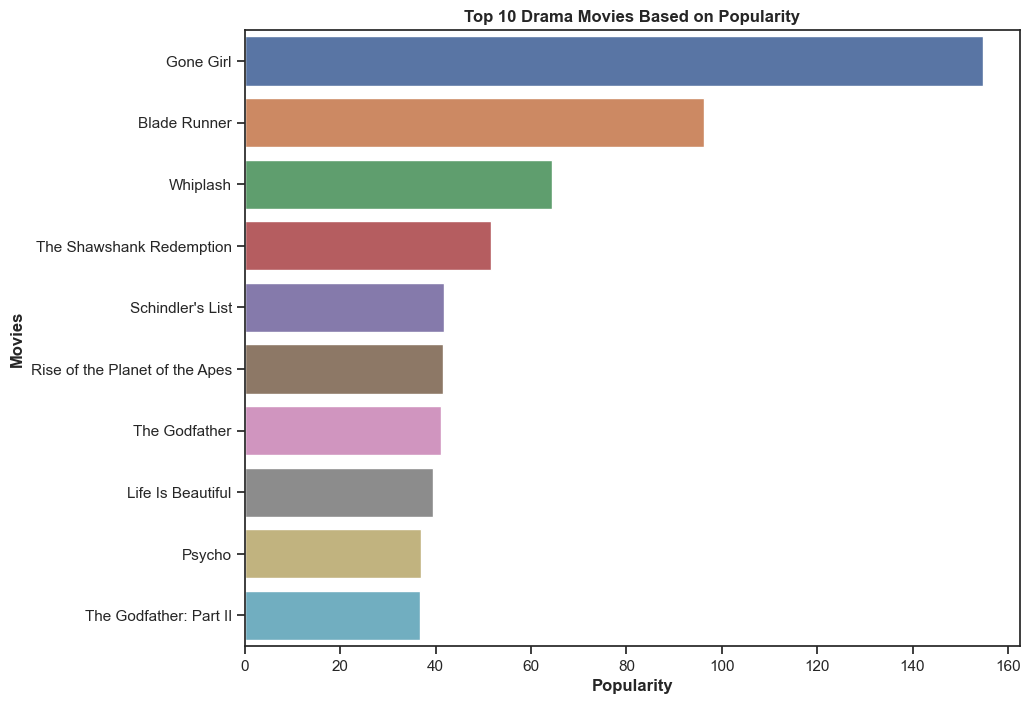

In [34]:
drama_movies = movies_data[movies_data['genres'].str.contains('Drama', case=False)]
drama_movies_sorted = drama_movies.sort_values('popularity', ascending=False)
top_10_drama_movies = drama_movies_sorted.head(10)

plt.figure(figsize=(10, 8))
axis = sns.barplot(x=top_10_drama_movies['popularity'], y=top_10_drama_movies['title'])
plt.title('Top 10 Drama Movies Based on Popularity', weight='bold')
plt.xlabel('Popularity', weight='bold')
plt.ylabel('Movies', weight='bold')
plt.savefig('Top_10_Drama_Movies.jpg')
plt.show()

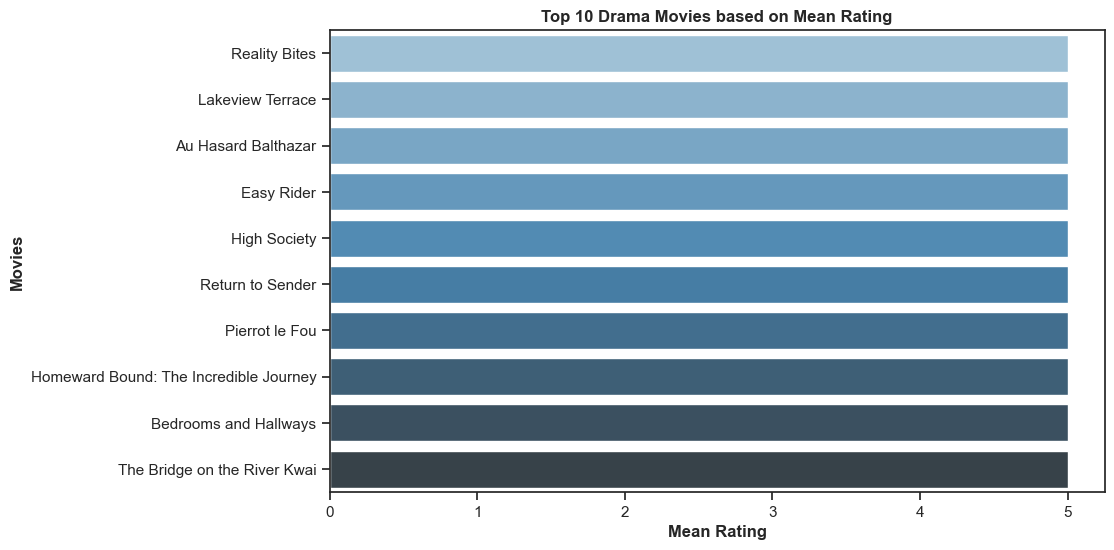

In [35]:
top_drama_movies = movies_data[movies_data['genres'].str.contains('Drama')].nlargest(10, 'mean_rating')

plt.figure(figsize=(10, 6))
sns.barplot(x=top_drama_movies['mean_rating'], y=top_drama_movies['title'], palette='Blues_d')
plt.title('Top 10 Drama Movies based on Mean Rating', weight='bold')
plt.xlabel('Mean Rating', weight='bold')
plt.ylabel('Movies', weight='bold')
plt.savefig('Top_drama_movies.jpg')
plt.show()


In [36]:
drama_movies = movies_data[movies_data['genres'].str.contains('Drama', case=False)]
drama_movies_sorted = drama_movies.sort_values('popularity', ascending=False)
top_10_drama_movies_p = drama_movies_sorted.head(10)

top_10_drama_movies_m = movies_data[movies_data['genres'].str.contains('Drama')].nlargest(10, 'mean_rating')

top_drama_movie_titles_p = set(top_10_drama_movies_p['title'])
top_drama_movie_titles_m = set(top_10_drama_movies_m['title'])

overlap_movies = top_drama_movie_titles_p.intersection(top_drama_movie_titles_m)

if len(overlap_movies) > 0:
    print("This movies is Popularity and high ranking:")
    for movie_title in overlap_movies:
        print(movie_title)
else:
    print("No same movie")


No same movie


In [37]:
drama_movies = movies_data[movies_data['genres'].str.contains('Drama', case=False)]
drama_movies_sorted = drama_movies.sort_values('popularity', ascending=False)
top_100_drama_movies_p = drama_movies_sorted.head(100)

top_100_drama_movies_m = movies_data[movies_data['genres'].str.contains('Drama')].nlargest(100, 'mean_rating')

top_drama_movie_titles_p = set(top_100_drama_movies_p['title'])
top_drama_movie_titles_m = set(top_100_drama_movies_m['title'])

overlap_movies = top_drama_movie_titles_p.intersection(top_drama_movie_titles_m)

if len(overlap_movies) > 0:
    print("This movies is Popularity and high ranking:")
    for movie_title in overlap_movies:
        print(movie_title)
else:
    print("No same movie")

This movies is Popularity and high ranking:
The Judge
Kingdom of Heaven
A Dog's Will
Whiplash
Heat
Seven Pounds
The Human Centipede 2 (Full Sequence)
A Clockwork Orange
The Lion King
The Huntsman: Winter's War
Edward Scissorhands
Forget Paris
Braveheart
Sicario
Inside Out
Trainspotting
xXx: State of the Union


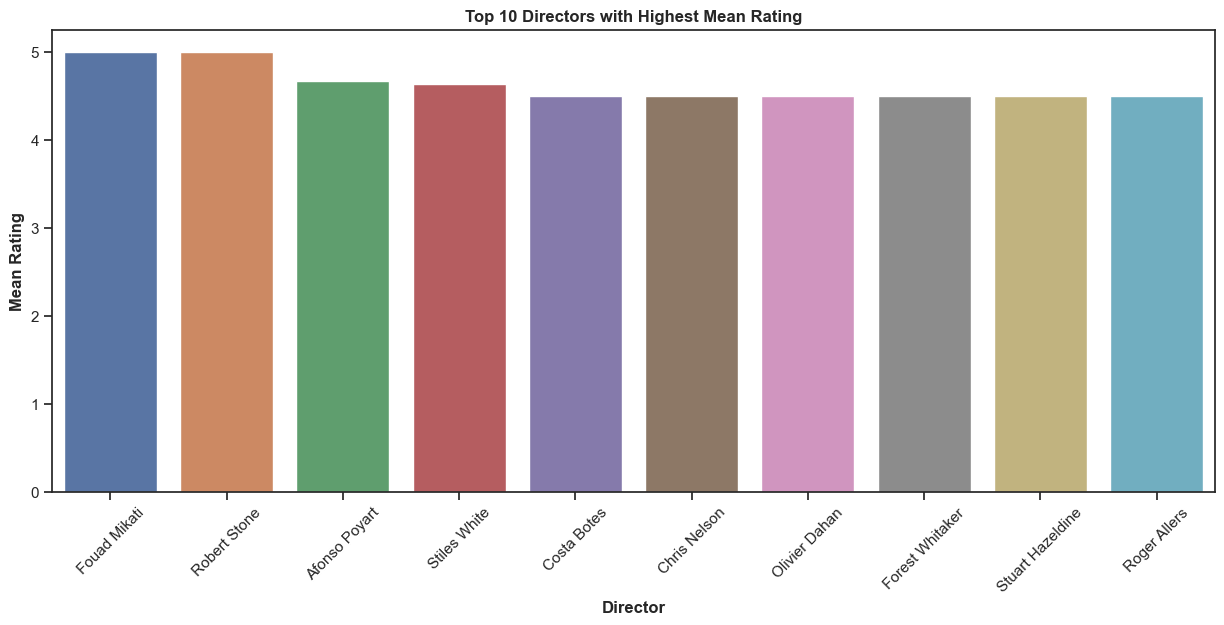

In [38]:
top_directors = movies_data.groupby('director')['mean_rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(15, 6))
axis = sns.barplot(x=top_directors.index, y=top_directors.values)
plt.title('Top 10 Directors with Highest Mean Rating', weight='bold')
plt.xlabel('Director', weight='bold')
plt.ylabel('Mean Rating', weight='bold')
plt.xticks(rotation=45)
plt.savefig('Top_directors_mean_rating.jpg')
plt.show()
